In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Load and prepare data
data = pd.read_csv("C:/Users/Harika/Documents/feynn labs/city_day.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
# Interpolate missing AQI values
data['AQI'] = data['AQI'].interpolate(method='time')

# ADF Test to check stationarity
adf_test = adfuller(data['AQI'].dropna())

In [5]:
# Differencing if needed
if adf_test[1] > 0.05:
    data_diff = data['AQI'].diff().dropna()
else:
    data_diff = data['AQI']

In [6]:
# Train the ARIMA model (p=1, d=1, q=1 for simplicity)
model = ARIMA(data_diff, order=(1, 1, 1))
arima_result = model.fit()

C:\Users\Harika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harika\anaconda3\Lib\

In [7]:
# Forecasting
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

C:\Users\Harika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Harika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
# Evaluate model
y_train = data_diff[:-forecast_steps]
y_test = data_diff[-forecast_steps:]
y_pred = arima_result.predict(start=len(y_train), end=len(data_diff) - 1)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

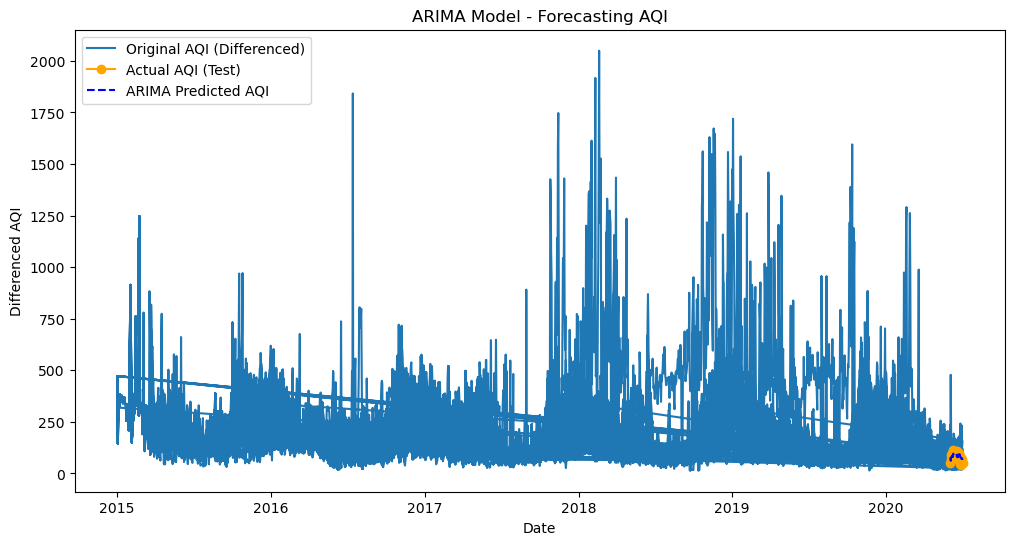

MAE: 13.539576870610661, MSE: 291.04917337222025, RMSE: 17.060163345414377


In [9]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label="Original AQI (Differenced)")
plt.plot(y_test.index, y_test, color='orange', marker='o', label="Actual AQI (Test)")
plt.plot(y_test.index, y_pred, color='blue', linestyle='--', label="ARIMA Predicted AQI")
plt.legend(loc="upper left")
plt.title("ARIMA Model - Forecasting AQI")
plt.xlabel("Date")
plt.ylabel("Differenced AQI")
plt.show()

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")